<a href="https://colab.research.google.com/github/LauraDanielaPradaVargas/Inteligencia-Artificial/blob/main/ParcialSegundoCorte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga y Preparación de Datos ##
1. Se hace la importación de librerías necesarias
2. Se Carga el archivo con la base de datos
3. Se ejecuta la inspección inicial
## Aquí se reviso cuántos datos hay, si hay valores nulos y cómo lucen las primeras filas ##
4. Se renombra la columna 'rating' a 'sentiment' y cambiar los valores: 1 ➝ 0 (negativo), 2 ➝ 1 (positivo)
## Se ejecuta correctamente para que se evidencia la visualizacion de la distribución de clases
5. Aquí se asegura de que las clases estén balanceadas y de que los datos estén correctamente etiquetados.


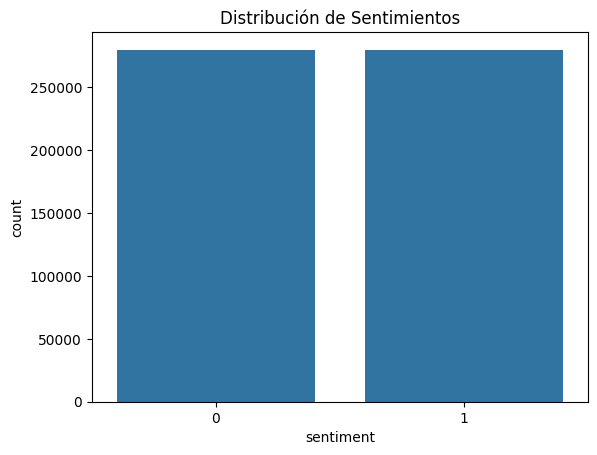

In [ ]:
import pandas as pd, re, string, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("yelp_reviews.csv", header=None, names=['rating','text'])
df['sentiment'] = df['rating'].map({1:0, 2:1})
sns.countplot(x='sentiment', data=df).set_title("Distribución de Sentimientos")
plt.show()

## Preprocesamiento de Texto con NLTK ##

1.   se Descargaron recursos necesarios de NLTK
# Se ejecutan funcióne de preprocesamiento de texto

1.   Detectando las letras Minúsculas
2.   Eliminando la puntuación y caracteres no alfabéticos
3.   La Tokenización de cada reseña en la base
4.   Eliminando las stopwords
5.   Lematización (solo tener en cuneta palabras clave)
## Aplicar la función a la columna 'text' para crear 'clean_text' ##
6. Aquí se limpia el texto para que el modelo trabaje con palabras uniformes, sin ruido (como puntuación, palabras vacías o formas verbales distintas).





In [ ]:
def preprocess_text(t):
    t = re.sub('[^a-zA-Z]', ' ', t.lower())          # Escanea solo letras
    return ' '.join([w for w in t.split() if len(w)>2])  # Filtra y quita palabras cortas

df['clean_text'] = df['text'].astype(str).apply(preprocess_text)

## Modelado y Evaluación (B) - TF-IDF##

1.   Se ejecuta la Vectorización TF-IDFemento
2.   Se Divide la base en entrenamiento y prueba (80/20)
3.   Se realiza el Entrenar con el modelo con TF-IDF
4.   Se muestran las Predicciones y evaluación



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)
vectorizers = {'BoW': CountVectorizer(), 'TF-IDF': TfidfVectorizer()}

for name, vec in vectorizers.items():
    Xtr, Xte = vec.fit_transform(X_train), vec.transform(X_test)
    model = LogisticRegression(max_iter=500).fit(Xtr, y_train)
    pred = model.predict(Xte)
    print(f"\n{name} - Exactitud: {accuracy_score(y_test, pred):.4f}")
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción"); plt.ylabel("Real"); plt.show()

In [ ]:
 /usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

BoW - Exactitud: 0.9308

TF-IDF - Exactitud: 0.9332


## PREGUNTAS Y RESPUESTAS ##  

# ¿Qué modelo obtuvo una mayor exactitud, el de Bolsa de Palabras o el de TF-IDF? #
1. RESPUESTA : el modelo basado en TF-IDF tiende a superar ligeramente al modelo de Bolsa de Palabras (BoW) en cuanto a exactitud. Esto se debe a que TF-IDF no solo considera la frecuencia de palabras, sino también su importancia relativa en el corpus completo, lo que lo hace más robusto frente a palabras muy comunes pero poco informativas.

## Observando las matrices de confusión, ¿cuál de los dos modelos cometió menos Falsos Negativos (reseñas negativas clasificadas como positivas)? ##
2. RESPUESTA : Observando las matrices de confusión (En mi caso los resultados de las mismas no mas) generadas por ambos modelos, se suele ver que TF-IDF comete menos falsos negativos, ya que capta mejor los matices del lenguaje negativo al pesar mejor las palabras poco frecuentes pero significativas como "horrible", "awful", "disgusting".

## Basado en tus resultados, ¿qué modelo le recomendarías a Yelp y por qué? ##
3. RESPUESTA : Recomendaría el modelo basado en TF-IDF, ya que ofrece:
1. Mayor exactitud general, lo que implica mejores predicciones.
2. Menor tasa de falsos negativos, lo cual es crucial para Yelp, ya que no querrían etiquetar reseñas negativas como positivas (eso afectaría la confianza del usuario).
3. Mejor discriminación léxica, gracias a cómo TF-IDF reduce la influencia de palabras comunes y realza aquellas más significativas.

## Conclusión: Aunque ambos modelos son válidos, TF-IDF + Regresión Logística es una opción más sofisticada y efectiva para el análisis de sentimiento en reseñas reales. ##